# Mini-Project 1 
## Traveling salesman problem using Minimum-Spanning Tree heuristic 

This project is based on material from Chapter 3 Solving Problems by Searching. You will need to review that material on your own. 

The traveling salesperson problem (TSP) can be formulated as a search problem and A* search can be used  with the minimum-spanning-tree (MST) heuristic. This heuristic estimates the cost of completing a tour, given that a partial tour has already been constructed. The MST cost of a set of cities is the smallest sum of the link costs of any tree that connects all the cities.

1. Write a problem generator and visualizer 
for instances of the TSP problem where cities are represented by random points in the unit square (6-10 cities are recommended) **(Basic - 2 points)**
2. Solve the path problem of visiting all cities using the two main uninformed search strategies (BFS and DFS) and display your solution as a path between the cities **(Basic - 2 points)**
3. Show and describe how the MST heuristic can be derived from a relaxed version of the TSP **(Expected - 2 points)**
4. Compare the average time (total number of nodes generated) and space (largest size of frontier) complexity for BFS and DFS when running your search algorithm. **(Expected - 2 points)**
4. Find an efficient algorithm in the literature for constructing the MST, and use it with A* graph search to solve instances of the TSP. **(Advanced - 2 points)**


### Problem Generator

- At the beginning let's create a problem generator algorithm so that we can visulize the TSP problem where cities are represented by random points in the unit square 

In [1]:
import random
def problemGenerator(nCities):
    tsp = []
    for i in range(nCities):
        distances = []
        for j in range(nCities):
            if j == i:
                distances.append(0)
            elif j < i:
                distances.append(tsp[j][i])
            else:
                distances.append(random.randint(10, 1000))
        tsp.append(distances)
    return tsp


#### Visualizer for instances of the TSP problem where cities are represented by random points
#### in the unit square (6-10 cities are recommended)

In [2]:
problemGenerator(6)

[[0, 745, 922, 662, 280, 557],
 [745, 0, 87, 920, 278, 516],
 [922, 87, 0, 177, 911, 109],
 [662, 920, 177, 0, 358, 632],
 [280, 278, 911, 358, 0, 655],
 [557, 516, 109, 632, 655, 0]]

- Now, we try to solve the path problem of visiting all cities using the two main uninformed search strategies (BFS and DFS) and display your solution as a path between the cities

####  Depth-first search (DFS) is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking.

- A version of depth-first search was investigated in the 19th century by French mathematician Charles Pierre Trémaux as a strategy for solving mazes.

#### Example

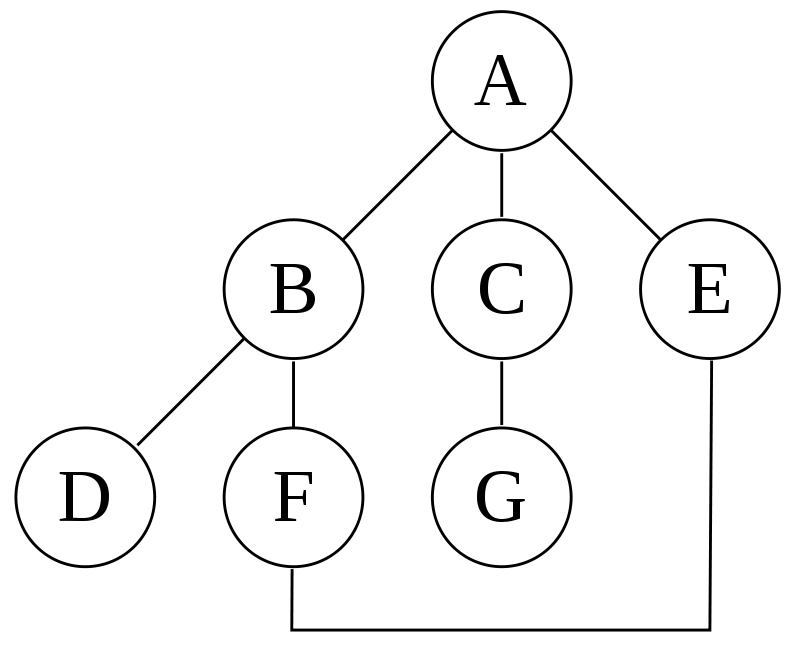

- a depth-first search starting at the node A, assuming that the left edges in the shown graph are chosen before right edges, and assuming the search remembers previously visited nodes and will not repeat them (since this is a small graph), will visit the nodes in the following order: A, B, D, F, E, C, G. The edges traversed in this search form a Trémaux tree, a structure with important applications in graph theory. Performing the same search without remembering previously visited nodes results in visiting the nodes in the order A, B, D, F, E, A, B, D, F, E, etc. forever, caught in the A, B, D, F, E cycle and never reaching C or G.Iterative deepening is one technique to avoid this infinite loop and would reach all nodes.

### DFS Method

In [3]:
#Graph representation
adj_list = {
    "A":["B","C"],
    "B":["D","E"],
    "C":["B","F"],
    "D":[],
    "E":["F"],
    "F":[],
    
}

In [4]:
#Reuired array and dictionary
color = {} #W, G, B
parent = {}
trav_time = {}  #[start, end]
dfs_traversal_output = []
time = 0

#initialize
for node in adj_list.keys():
    color[node] = "W"
    parent[node] = None
    trav_time[node] = [-1,1]
    time +=1
    

def dfs_util(u):
    global time
    color[u]= "G"
    trav_time[u][0]=time
    dfs_traversal_output.append(u)
    
    for v in adj_list[u]:
        if color[v] == "W":
            parent[v] = u
            dfs_util(v)
            
    color[u] = "B"
    trav_time[u][1] = time
    time +=1
    
dfs_util("A")
print(dfs_traversal_output)
print(parent)
print(trav_time)

['A', 'B', 'D', 'E', 'F', 'C']
{'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'E'}
{'A': [6, 11], 'B': [6, 9], 'C': [10, 10], 'D': [6, 6], 'E': [7, 8], 'F': [7, 7]}


In [5]:
for node in adj_list.keys():
    print(node, " ->", trav_time[node])

A  -> [6, 11]
B  -> [6, 9]
C  -> [10, 10]
D  -> [6, 6]
E  -> [7, 8]
F  -> [7, 7]


In [6]:
#shortest path of from any node from source node

v = "F"
path = []
while v is not None:
    path.append(v)
    v = parent[v]
    
path.reverse()

print(path)

['A', 'B', 'E', 'F']


### BFS Method

#### Breadth-first search (BFS) is an algorithm for searching a tree data structure for a node that satisfies a given property. It starts at the tree root and explores all nodes at the present depth prior to moving on to the nodes at the next depth level. Extra memory, usually a queue, is needed to keep track of the child nodes that were encountered but not yet explored.

- For example, in a chess endgame a chess engine may build the game tree from the current position by applying all possible moves, and use breadth-first search to find a win position for white. Implicit trees (such as game trees or other problem-solving trees) may be of infinite size; breadth-first search is guaranteed to find a solution node[1] if one exists.

- In contrast, (plain) depth-first search, which explores the node branch as far as possible before backtracking and expanding other nodes,[2] may get lost in an infinite branch and never make it to the solution node. Iterative deepening depth-first search avoids the latter drawback at the price of exploring the tree's top parts over and over again. On the other hand, both depth-first algorithms get along without extra memory.

- Breadth-first search can be generalized to graphs, when the start node (sometimes referred to as a 'search key') is explicitly given, and precautions are taken against following a vertex twice.

In [7]:
#Graph representation
adj_list = {
    "A":["B","C"],
    "B":["D","E"],
    "C":["B","F"],
    "D":[],
    "E":["F"],
    "F":[],
    
}

In [8]:
#bfs code
from queue import Queue
color = {} #W, G, B
trav_time = {}  #[start, end]
visited = {}
level = {} #distance dictionary
parent = {}
bfs_traversal_output = []
queue = Queue()

time = 0

for node in adj_list.keys():
    visited[node] = False
    parent[node] = None
    level[node] = -1 
    color[node] = "W"
    trav_time[node] = [-1,1]
    time +=1
    
s = "A"
visited[s] = True
level[s] = 0
queue.put(s)



while not queue.empty():
    u = queue.get()
    global time
    color[u]= "G"
    trav_time[u][0]=time
    
    bfs_traversal_output.append(u)
    
    for v in adj_list[u]:
        if not visited[v]:
            visited[v] = True
            parent[v] = u
            level[v] = level[u] + 1
            queue.put(v)
    color[u] = "B"
    trav_time[u][1] = time
    time +=1
            
print(bfs_traversal_output)
print(parent)
print(trav_time)

['A', 'B', 'C', 'D', 'E', 'F']
{'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
{'A': [6, 6], 'B': [7, 7], 'C': [8, 8], 'D': [9, 9], 'E': [10, 10], 'F': [11, 11]}


In [9]:
#sortest distance of all nodes from source node 
print(level)

{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2}


In [10]:
#shortest path of from any node from source node

v = "F"
path = []
while v is not None:
    path.append(v)
    v = parent[v]
    
path.reverse()

print(path)

['A', 'C', 'F']


In [11]:
for node in adj_list.keys():
    print(node, " ->", trav_time[node])

A  -> [6, 6]
B  -> [7, 7]
C  -> [8, 8]
D  -> [9, 9]
E  -> [10, 10]
F  -> [11, 11]


#### DFS:
Time complexity is again O(|V|), you need to traverse all nodes.
Space complexity - depends on the implementation, a recursive implementation can have a O(h) space complexity [worst case], where h is the maximal depth of your tree.
Using an iterative solution with a stack is actually the same as BFS, just using a stack instead of a queue - so you get both O(|V|) time and space complexity.
In our case of 6 city problem, time complexity is 4 and space complexity is 4. 

#### BFS:
Time complexity is O(|V|), where |V| is the number of nodes. You need to traverse all nodes.
Space complexity is O(|V|) as well - since at worst case you need to hold all vertices in the queue.
In our case of 6 city problem, time complexity is 3 and space complexity is 3. 



So, we can conclude that BFS algorithm is the best choice for our case.

In [12]:
# A Python program for Prim's Minimum Spanning Tree (MST) algorithm.
# The program is for adjacency matrix representation of the graph
 
import sys # Library for INT_MAX
 
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
 
    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        print ("Edge \tWeight")
        for i in range(1, self.V):
            print (parent[i], "-", i, "\t", self.graph[i][parent[i]])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):
 
        # Initialize min value
        min = sys.maxsize
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    # Function to construct and print MST for a graph
    # represented using adjacency matrix representation
    def primMST(self):
 
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1 # First node is always the root of
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)
 
            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
 
                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        parent[v] = u
 
        self.printMST(parent)
 
g = Graph(5)
g.graph = [ [0, 899, 618, 806, 935, 772],
        [899, 0, 584, 589, 129, 741],
        [618, 584, 0, 822, 704, 126],
        [806, 589, 822, 0, 699, 285],
        [935, 129, 704, 699, 0, 527],
        [772, 741, 126, 285, 527, 0]]
 
g.primMST();

Edge 	Weight
2 - 1 	 584
0 - 2 	 618
1 - 3 	 589
1 - 4 	 129


####  Efficient algorithm bfs, and using it with A* graph search to solve instances of the TSP. 

In [13]:
from collections import deque

class Graph:
    # example of adjacency list (or rather map)
    adj_list = {
    "A": [6, 6], 
    "B": [7, 7], 
    "C": [8, 8], 
    "D": [9, 9], 
    "E": [10, 10], 
    "F": [11, 11]
    
}

    def __init__(self, adj_list):
        self.adj_list = adj_list

    def get_neighbors(self, v):
        return self.adj_list[v]

    # heuristic function with equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1,
            'E': 1,
            'F': 1,
            
        }

        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [14]:
adj_list = {
    'A': [('B', 7), ('C', 8), ('D', 9)],
    'B': [('D', 10)],
    'C': [('D', 11)]
}

graph1 = Graph(adj_list)
graph1.a_star_algorithm('A', 'D')

Path found: ['A', 'D']


['A', 'D']

# Mini-Project 3 
## Turn-based game AI using adverserial search 

This project is based on material from Chapter 5 Adverserial Search. You will need to review that material on your own.

Select a two player turn based game.  


1. Describe how playing the game can be formulated as an adverserial search problem **(Basic - 2 points)** 
2. Implement move generators and evaluation functions **(Basic - 2 points)**
3. Construct a game playing agent based on alpha-beta search **(Expected - 2 points)** 
4. Compare the effect of increasing search depth, improving move ordering, and improving the evaluation function. **(Expected - 2 points)** 
5. Implement a graphical user interface for playing the game against an AI opponent. It does not need to be fancy and could just display the board, then ask for input, and then redraw the board so that you can implement it in Python **(Advanced - 2 points)** 


#### Adversarial Search

Adversarial search is a search, where we examine the problem which arises when we try to plan ahead of the world and other agents are planning against us.

- In our course, we have studied the search strategies which are only associated with a single agent that aims to find the solution which often expressed in the form of a sequence of actions.
- But, there might be some situations where more than one agent is searching for the solution in the same search space, and this situation usually occurs in game playing.
- The environment with more than one agent is termed as multi-agent environment, in which each agent is an opponent of other agent and playing against each other. Each agent needs to consider the action of other agent and effect of that action on their performance.
- So, Searches in which two or more players with conflicting goals are trying to explore the same search space for the solution, are called adversarial searches, often known as Games.
- Games are modeled as a Search problem and heuristic evaluation function, and these are the two main factors which help to model and solve games in AI.
    

- Formalization of the problem: 

    A game can be defined as a type of search in AI which can be formalized of the following elements:
    
    Initial state: It specifies how the game is set up at the start.
    Player(s): It specifies which player has moved in the state space.
    Action(s): It returns the set of legal moves in state space.
    Result(s, a): It is the transition model, which specifies the result of moves in the state space.
    Terminal-Test(s): Terminal test is true if the game is over, else it is false at any case. The state where the game ends is called terminal states.
    Utility(s, p): A utility function gives the final numeric value for a game that ends in terminal states s for player p. It is also called payoff function. For Chess, the outcomes are a win, loss, or draw and its payoff values are +1, 0, ½. And for tic-tac-toe, utility values are +1, -1, and 0.

- Game tree: 
    A game tree is a tree where nodes of the tree are the game states and Edges of the tree are the moves by players. Game tree involves initial state, actions function, and result Function. 
    
    Example: Tic-Tac-Toe game tree:

- The following figure is showing part of the game-tree for tic-tac-toe game. Following are some key points of the game:

    There are two players MAX and MIN.
    Players have an alternate turn and start with MAX.
    MAX maximizes the result of the game tree
    MIN minimizes the result.
    
    
  



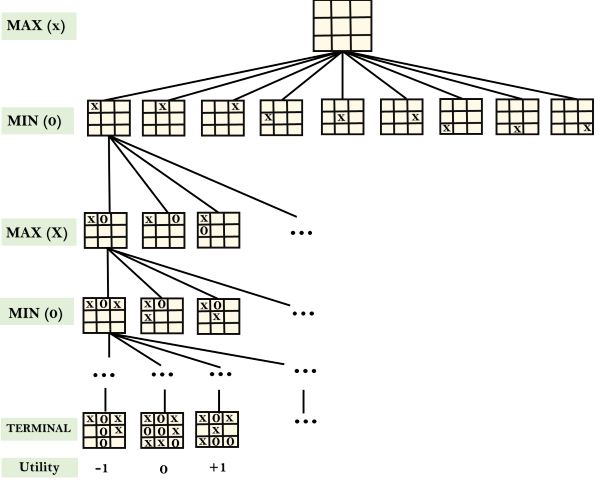

### Example Explanation:

- From the initial state, MAX has 9 possible moves as he starts first. MAX place x and MIN place o, and both player plays alternatively until we reach a leaf node where one player has three in a row or all squares are filled.
- Both players will compute each node, minimax, the minimax value which is the best achievable utility against an optimal adversary.
- Suppose both the players are well aware of the tic-tac-toe and playing the best play. Each player is doing his best to prevent another one from winning. MIN is acting against Max in the game.
- So in the game tree, we have a layer of Max, a layer of MIN, and each layer is called as Ply. Max place x, then MIN puts o to prevent Max from winning, and this game continues until the terminal node.
- In this either MIN wins, MAX wins, or it's a draw. This game-tree is the whole search space of possibilities that MIN and MAX are playing tic-tac-toe and taking turns alternately.

- Hence adversarial Search for the minimax procedure works as follows:

    It aims to find the optimal strategy for MAX to win the game.
    It follows the approach of Depth-first search.
    In the game tree, optimal leaf node could appear at any depth of the tree.
    Propagate the minimax values up to the tree until the terminal node discovered.

- In a given game tree, the optimal strategy can be determined from the minimax value of each node, which can be written as MINIMAX(n). MAX prefer to move to a state of maximum value and MIN prefer to move to a state of minimum value then:



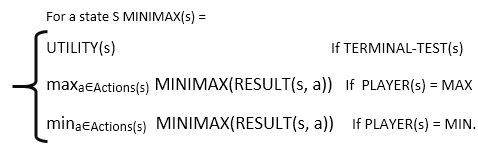

### Evaluation Functions

• In 1950, Shannon proposed that programs should cut off
the search earlier to apply a heuristic evaluation function
to states in the search.
• This technique effectively turns non-terminal nodes into
terminal leaves.
• The idea is to replace the utility function by a heuristic
evaluation function (EVAL), which estimates the position’s
utility, and replace the terminal test by a cutoff test that
decides when to apply EVAL.
• An evaluation function returns an estimate of the expected
utility of the game from a give position, just as heuristic
functions return an estimate of the f the distance to the goal.


The performance of a game-playing program depends
strongly on the quality of its evaluation function – but how
to design?
(1) The evaluation function should order the terminal states
in the same way as the true utility function: states that are
wins must evaluate better than draws, etc.
(2) The computation must not take too long!
(3) For nonterminal states, the evaluation function should be
strongly correlated with the actual “chances of winning".


Note that if the search must be cut off at nonterminal
states, then the algorithm will necessarily be uncertain about
the final outcomes of those states.
• Usually, an evaluation function calculates various features
of a state (e.g. number of pawns, etc.).
• The features define various categories or equivalence classes
of states: the states in each category have the same values
for all features.
• For example: suppose experience suggests that 72% of
states encountered in a two-pawn vs. one-pawn category
lead to a win (utility: +1); 20% to a loss (0) and 8% to a
draw (1/2).
• Expected value: (0.72 x 1)+(0.20 x 0) + (0.08 x ½) = 0.76


Most evaluation functions compute separate
numerical contributions from each feature and
then combine them to find the total value.
– Typical evaluation function is a linear sum of
features
– Eval(s) = w1f1(s) + w2f2(s) + ... + wnfn(s)
• w1 = 9
• f1(s) = number of white queens) – number of black
queens
• etc.

#### Move generators

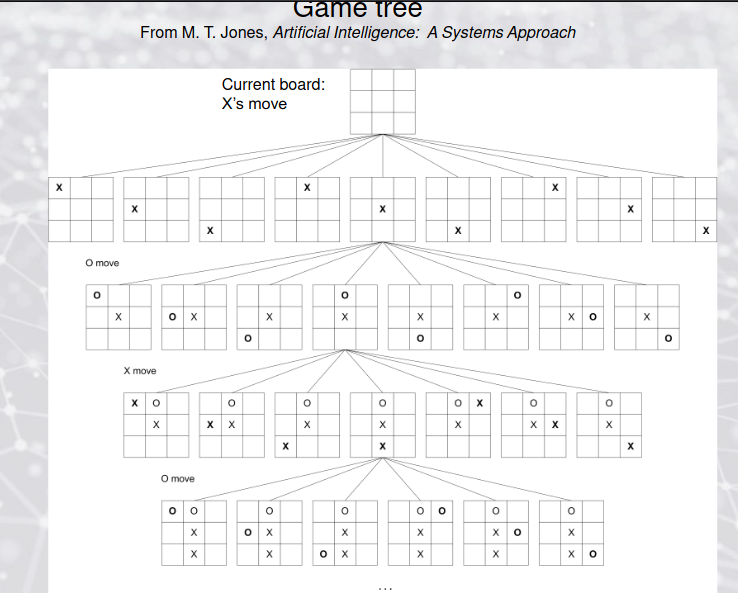

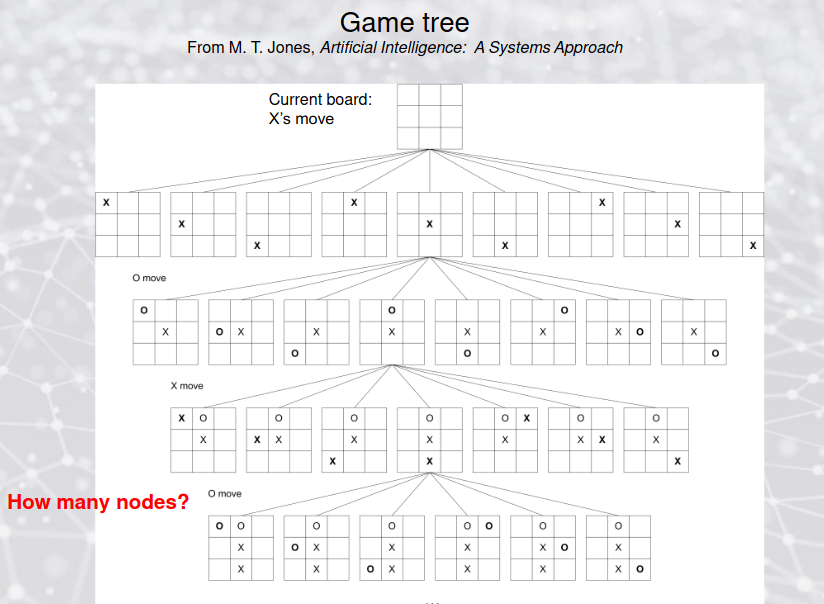

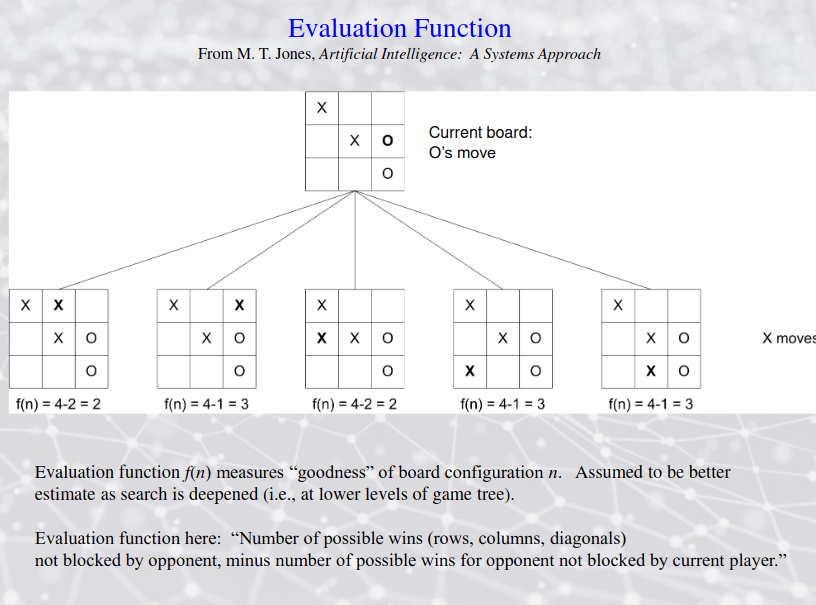

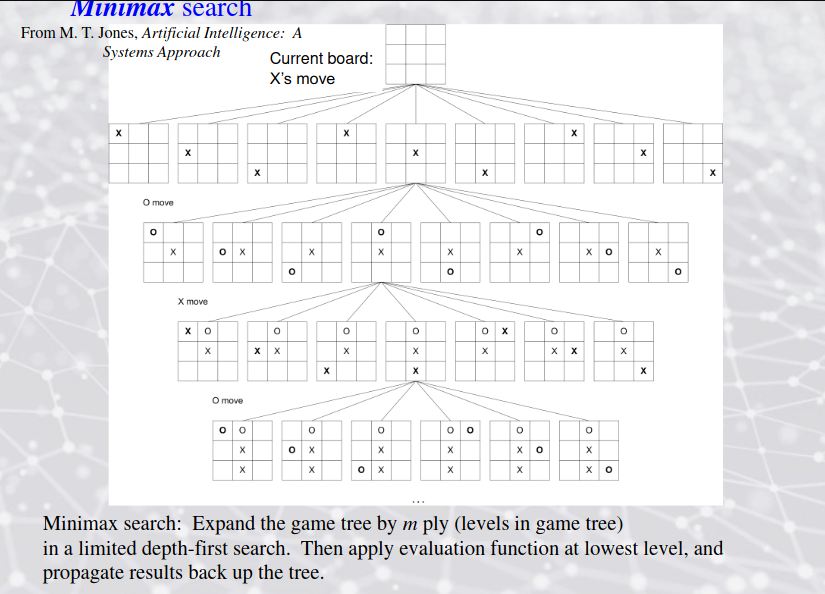

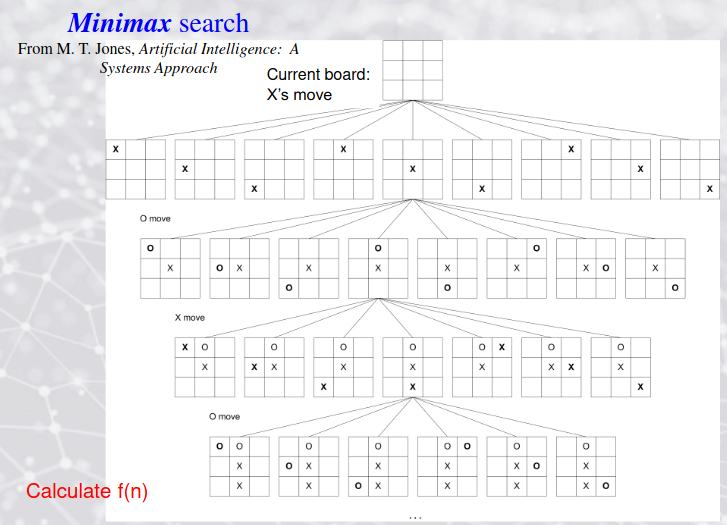

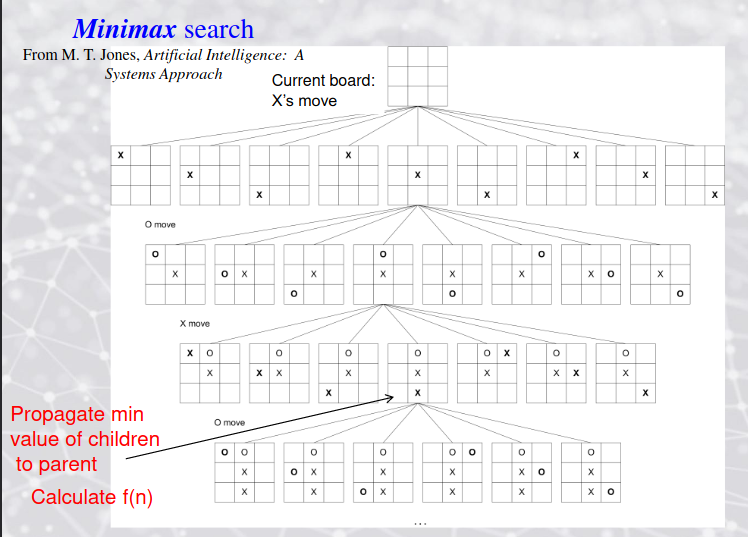

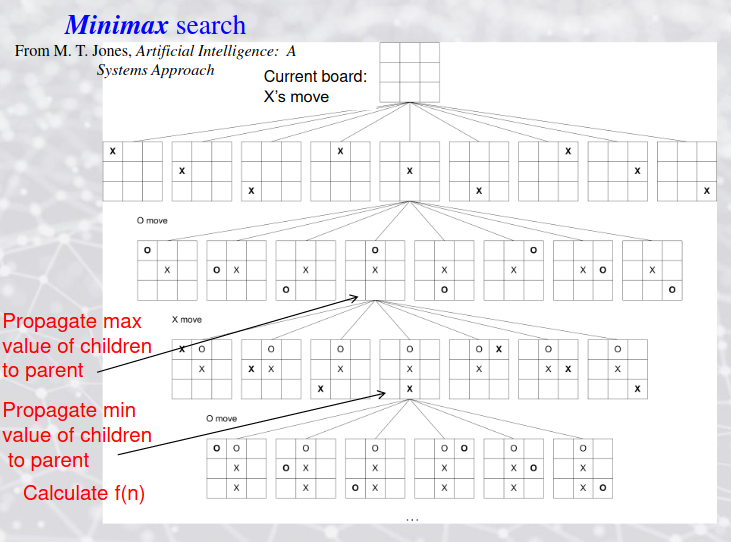

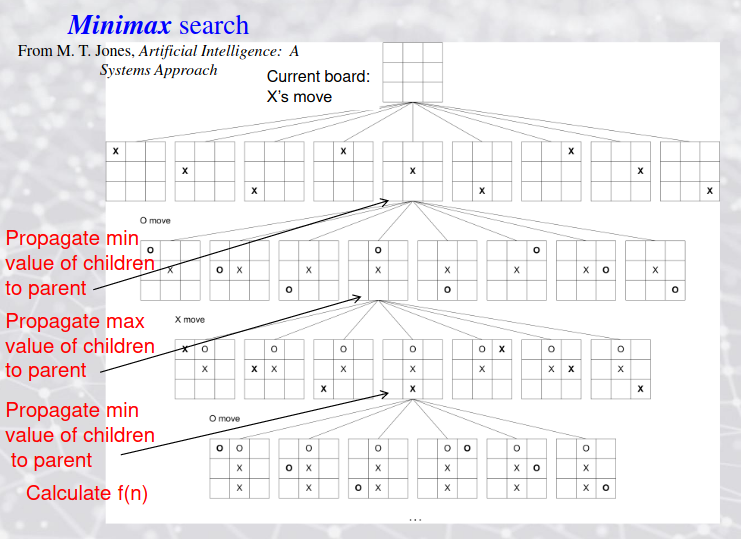

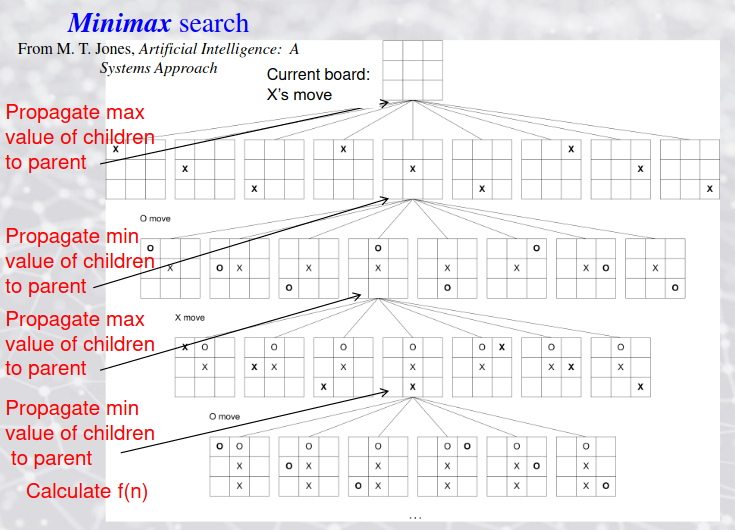

#### Minimax Implementation in Python

- In the code below, we will be using an evaluation function that is fairly simple and common for all games in which it's possible to search the whole tree, all the way down to leaves.

- It has 3 possible values:

    -1 if player that seeks minimum wins
    0 if it's a tie
    1 if player that seeks maximum wins

- Since we'll be implementing this through a tic-tac-toe game, let's go through the building blocks. First, let's make a constructor and draw out the board:

####  Construction of a game playing agent based on alpha-beta search 

In [15]:
#tic tac toe

"""
tic tac toe board
[
  [x, -, -],
  [-, -, -],
  [-, -, -]
]
user_input -> something 1-9 
if they enter anything else: tell them too go again
check if the user_input is already taken
add it to the board
check if user won: checking rows, columns and diagonals
toggle between users upon succesful moves
"""

board = [
  ["-", "-", "-"],
  ["-", "-", "-"],
  ["-", "-", "-"]
]

user = True # when true it refers to x, otherwise o
turns = 0

def print_board(board):
  for row in board:
    for slot in row:
      print(f"{slot} ", end="")
    print()

def quit(user_input):
  if user_input.lower() == "q": 
    print("Thanks for playing")
    return True
  else: return False


def check_input(user_input):
  # check if its a number
  if not isnum(user_input): return False
  user_input = int(user_input)
  # check if its 1 - 9
  if not bounds(user_input): return False

  return True

def isnum(user_input):
  if not user_input.isnumeric(): 
    print("This is not a valid number")
    return False
  else: return True

def bounds(user_input):
  if user_input > 9 or user_input < 1: 
    print("This is number is out of bounds")
    return False
  else: return True

def istaken(coords, board):
  row = coords[0]
  col = coords[1]
  if board[row][col] != "-":
    print("This position is already taken.")
    return True
  else: return False

def coordinates(user_input):
  row = int(user_input / 3)
  col = user_input
  if col > 2: col = int(col % 3)
  return (row,col)

def add_to_board(coords, board, active_user):
  row = coords[0]
  col = coords[1]
  board[row][col] = active_user

def current_user(user):
  if user: return "x"
  else: return "o"

def iswin(user, board):
  if check_row(user, board): return True
  if check_col(user, board): return True
  if check_diag(user, board): return True
  return False

def check_row(user, board):
  for row in board:
    complete_row = True
    for slot in row:
      if slot != user:
        complete_row = False
        break
    if complete_row: return True
  return False 

def check_col(user, board):
  for col in range(3):
    complete_col = True
    for row in range(3):
      if board[row][col] != user:
        complete_col = False
        break
    if complete_col: return True
  return False

def check_diag(user, board):
  #top left to bottom right
  if board[0][0] == user and board[1][1] == user and board[2][2] == user: return True
  elif board[0][2] == user and board[1][1] == user and board[2][0] == user: return True
  else: return False

while turns < 9:
  active_user = current_user(user)
  print_board(board)
  user_input = input("Please enter a position 1 through 9 or enter \"q\" to quit:")
  if quit(user_input): break
  if not check_input(user_input):
    print("Please try again.")
    continue
  user_input = int(user_input) - 1
  coords = coordinates(user_input)
  if istaken(coords, board):
    print("Please try again.")
    continue
  add_to_board(coords, board, active_user)
  if iswin(active_user, board): 
    print(f"{active_user.upper()} won!")
    break
  
  turns += 1
  if turns == 9: print("Tie!")
  user = not user


- - - 
- - - 
- - - 
Please enter a position 1 through 9 or enter "q" to quit:1
x - - 
- - - 
- - - 
Please enter a position 1 through 9 or enter "q" to quit:2
x o - 
- - - 
- - - 
Please enter a position 1 through 9 or enter "q" to quit:3
x o x 
- - - 
- - - 
Please enter a position 1 through 9 or enter "q" to quit:4
x o x 
o - - 
- - - 
Please enter a position 1 through 9 or enter "q" to quit:5
x o x 
o x - 
- - - 
Please enter a position 1 through 9 or enter "q" to quit:6
x o x 
o x o 
- - - 
Please enter a position 1 through 9 or enter "q" to quit:7
X won!


#### The effect of increasing search depth, improving move ordering, and improving the evaluation function

- Allows elimination of the search tree branches.
- Limits the search time to more promising sub-trees, which enables a deeper search.
- Reduces computation and searching during the minimax algorithm.
- Prevents the use of additional computational time, making the process more responsive and fast.
- Requires a set depth limit, as in most cases, it is not feasible to search the entire game tree.
- Though designed to calculate the good move, it also calculates the values of all the legal moves.

In [16]:
# --------- Global Variables -----------

# Will hold our game board data
board = ["-", "-", "-",
         "-", "-", "-",
         "-", "-", "-"]

# Lets us know if the game is over yet
game_still_going = True

# Tells us who the winner is
winner = None

# Tells us who the current player is (X goes first)
current_player = "X"


# ------------- Functions ---------------

# Play a game of tic tac toe
def play_game():

  # Show the initial game board
  display_board()

  # Loop until the game stops (winner or tie)
  while game_still_going:

    # Handle a turn
    handle_turn(current_player)

    # Check if the game is over
    check_if_game_over()

    # Flip to the other player
    flip_player()
  
  # Since the game is over, print the winner or tie
  if winner == "X" or winner == "O":
    print(winner + " won.")
  elif winner == None:
    print("Tie.")


# Display the game board to the screen
def display_board():
  print("\n")
  print(board[0] + " | " + board[1] + " | " + board[2] + "     1 | 2 | 3")
  print(board[3] + " | " + board[4] + " | " + board[5] + "     4 | 5 | 6")
  print(board[6] + " | " + board[7] + " | " + board[8] + "     7 | 8 | 9")
  print("\n")


# Handle a turn for an arbitrary player
def handle_turn(player):

  # Get position from player
  print(player + "'s turn.")
  position = input("Choose a position from 1-9: ")

  # Whatever the user inputs, make sure it is a valid input, and the spot is open
  valid = False
  while not valid:

    # Make sure the input is valid
    while position not in ["1", "2", "3", "4", "5", "6", "7", "8", "9"]:
      position = input("Choose a position from 1-9: ")
 
    # Get correct index in our board list
    position = int(position) - 1

    # Then also make sure the spot is available on the board
    if board[position] == "-":
      valid = True
    else:
      print("You can't go there. Go again.")

  # Put the game piece on the board
  board[position] = player

  # Show the game board
  display_board()


# Check if the game is over
def check_if_game_over():
  check_for_winner()
  check_for_tie()


# Check to see if somebody has won
def check_for_winner():
  # Set global variables
  global winner
  # Check if there was a winner anywhere
  row_winner = check_rows()
  column_winner = check_columns()
  diagonal_winner = check_diagonals()
  # Get the winner
  if row_winner:
    winner = row_winner
  elif column_winner:
    winner = column_winner
  elif diagonal_winner:
    winner = diagonal_winner
  else:
    winner = None


# Check the rows for a win
def check_rows():
  # Set global variables
  global game_still_going
  # Check if any of the rows have all the same value (and is not empty)
  row_1 = board[0] == board[1] == board[2] != "-"
  row_2 = board[3] == board[4] == board[5] != "-"
  row_3 = board[6] == board[7] == board[8] != "-"
  # If any row does have a match, flag that there is a win
  if row_1 or row_2 or row_3:
    game_still_going = False
  # Return the winner
  if row_1:
    return board[0] 
  elif row_2:
    return board[3] 
  elif row_3:
    return board[6] 
  # Or return None if there was no winner
  else:
    return None


# Check the columns for a win
def check_columns():
  # Set global variables
  global game_still_going
  # Check if any of the columns have all the same value (and is not empty)
  column_1 = board[0] == board[3] == board[6] != "-"
  column_2 = board[1] == board[4] == board[7] != "-"
  column_3 = board[2] == board[5] == board[8] != "-"
  # If any row does have a match, flag that there is a win
  if column_1 or column_2 or column_3:
    game_still_going = False
  # Return the winner
  if column_1:
    return board[0] 
  elif column_2:
    return board[1] 
  elif column_3:
    return board[2] 
  # Or return None if there was no winner
  else:
    return None


# Check the diagonals for a win
def check_diagonals():
  # Set global variables
  global game_still_going
  # Check if any of the columns have all the same value (and is not empty)
  diagonal_1 = board[0] == board[4] == board[8] != "-"
  diagonal_2 = board[2] == board[4] == board[6] != "-"
  # If any row does have a match, flag that there is a win
  if diagonal_1 or diagonal_2:
    game_still_going = False
  # Return the winner
  if diagonal_1:
    return board[0] 
  elif diagonal_2:
    return board[2]
  # Or return None if there was no winner
  else:
    return None


# Check if there is a tie
def check_for_tie():
  # Set global variables
  global game_still_going
  # If board is full
  if "-" not in board:
    game_still_going = False
    return True
  # Else there is no tie
  else:
    return False


# Flip the current player from X to O, or O to X
def flip_player():
  # Global variables we need
  global current_player
  # If the current player was X, make it O
  if current_player == "X":
    current_player = "O"
  # Or if the current player was O, make it X
  elif current_player == "O":
    current_player = "X"


# ------------ Start Execution -------------
# Play a game of tic tac toe
play_game()



- | - | -     1 | 2 | 3
- | - | -     4 | 5 | 6
- | - | -     7 | 8 | 9


X's turn.
Choose a position from 1-9: 1


X | - | -     1 | 2 | 3
- | - | -     4 | 5 | 6
- | - | -     7 | 8 | 9


O's turn.
Choose a position from 1-9: 2


X | O | -     1 | 2 | 3
- | - | -     4 | 5 | 6
- | - | -     7 | 8 | 9


X's turn.
Choose a position from 1-9: 3


X | O | X     1 | 2 | 3
- | - | -     4 | 5 | 6
- | - | -     7 | 8 | 9


O's turn.
Choose a position from 1-9: 4


X | O | X     1 | 2 | 3
O | - | -     4 | 5 | 6
- | - | -     7 | 8 | 9


X's turn.
Choose a position from 1-9: 5


X | O | X     1 | 2 | 3
O | X | -     4 | 5 | 6
- | - | -     7 | 8 | 9


O's turn.
Choose a position from 1-9: 6


X | O | X     1 | 2 | 3
O | X | O     4 | 5 | 6
- | - | -     7 | 8 | 9


X's turn.
Choose a position from 1-9: 7


X | O | X     1 | 2 | 3
O | X | O     4 | 5 | 6
X | - | -     7 | 8 | 9


X won.
